# COMP5331 Group 6 Project: Resilient k-Clustering

In [1]:
%load_ext autoreload
%autoreload 2

## Preprocess datasets
The raw data should be stored at:
```
project
📂dataset
└───📂birch
│       │ 📜birch1.txt
│       │ 📜birch2.txt
│       │ 📜birch3.txt
└───📂high_dim
│       │ 📜dim032.txt
│       │ 📜dim064.txt
│       │ 📜dim128.txt
└───📂snap_standford
│       │ 📜Brightkite_totalCheckins.txt
│       │ 📜Gowalla_totalCheckins.txt
└───📂uber
        │ 📜uber-raw-data-jun14.csv
```

In [2]:
from src.preprocess.process_uber import process_uber
ds_path = "./dataset/uber/uber-raw-data-jun14.csv"
save_path = "./dataset/uber/"
process_uber(ds_path, save_path)

11/24/2024, 17:17:41: finish


In [3]:
from src.preprocess.process_geo import process_geo
ds_names = ["Brightkite", "Gowalla"]
for ds_name in ds_names:
    print(f"Processing {ds_name} dataset")
    ds_path = f"./dataset/snap_standford/{ds_name}_totalCheckins.txt"
    save_path = "./dataset/snap_standford/"
    process_geo(ds_path, save_path, ds_name)

Processing Brightkite dataset
11/24/2024, 17:17:42: matching
11/24/2024, 17:17:42: finish
Processing Gowalla dataset
11/24/2024, 17:17:42: matching
11/24/2024, 17:17:42: finish


In [4]:
from src.preprocess.process_birch import process_birch, shrink_birch

ds_names = ['birch1', 'birch2', 'birch3']

for ds_name in ds_names:
    ds_path = f"./dataset/birch/{ds_name}.txt"
    save_path = "./dataset/birch"
    process_birch(ds_path, save_path, ds_name)
    ds_path = f"./dataset/birch/{ds_name}_epsilon.csv"
    shrink_birch(ds_path, save_path, ds_name)

D:\School\PG\2024 Fall\Comp 5331\Group project\comp5331-grp6\src\preprocess\process_birch.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(dataset_path, delim_whitespace=True, header=None)
D:\School\PG\2024 Fall\Comp 5331\Group project\comp5331-grp6\src\preprocess\process_birch.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(dataset_path, delim_whitespace=True, header=None)
D:\School\PG\2024 Fall\Comp 5331\Group project\comp5331-grp6\src\preprocess\process_birch.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(dataset_path, delim_whitespace=True, header=None)


In [5]:
from src.preprocess.process_high_dim import process_high_dim
dims = ['032', '064', '128']

for dim in dims:
    ds_name = "dim"+dim
    ds_path = f"./dataset/high_dim/{ds_name}.txt"
    save_path = "./dataset/high_dim"
    process_high_dim(ds_path, save_path, ds_name)

D:\School\PG\2024 Fall\Comp 5331\Group project\comp5331-grp6\src\preprocess\process_high_dim.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(dataset_path, delim_whitespace=True, header=None)
D:\School\PG\2024 Fall\Comp 5331\Group project\comp5331-grp6\src\preprocess\process_high_dim.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(dataset_path, delim_whitespace=True, header=None)
D:\School\PG\2024 Fall\Comp 5331\Group project\comp5331-grp6\src\preprocess\process_high_dim.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(dataset_path, delim_whitespace=True, header=None)


### Visualize the data

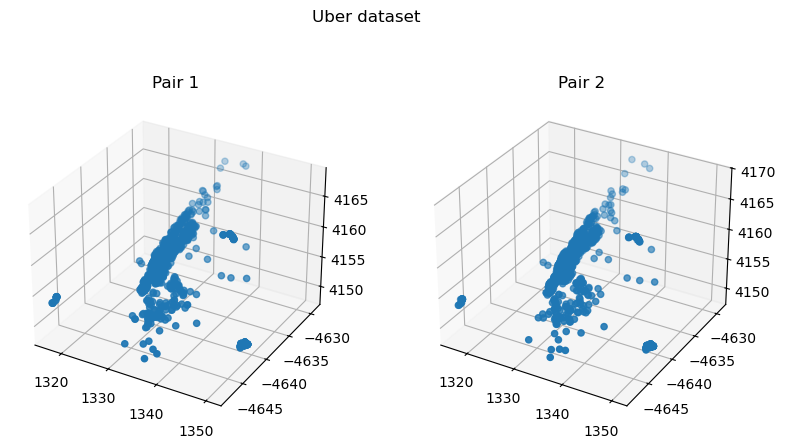

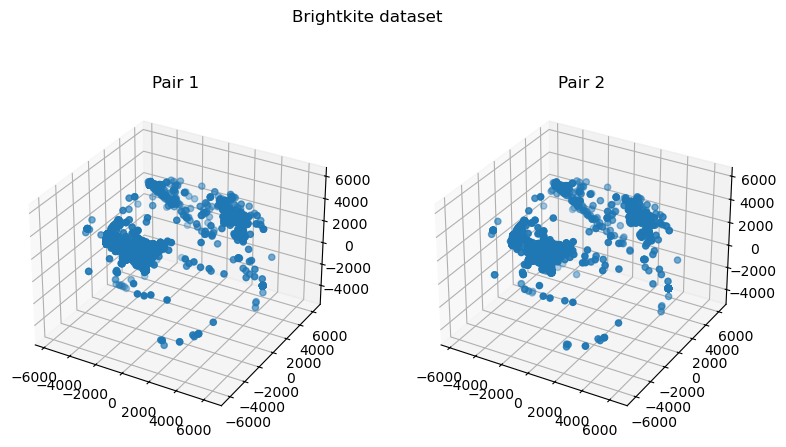

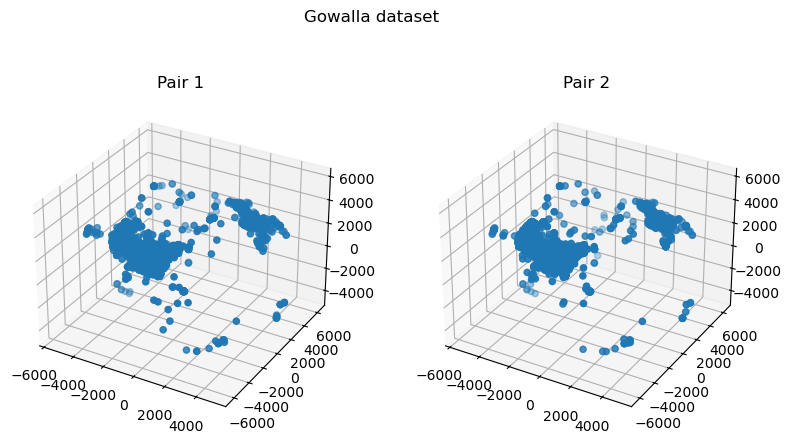

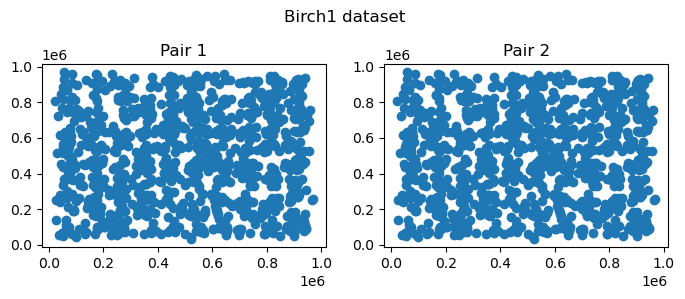

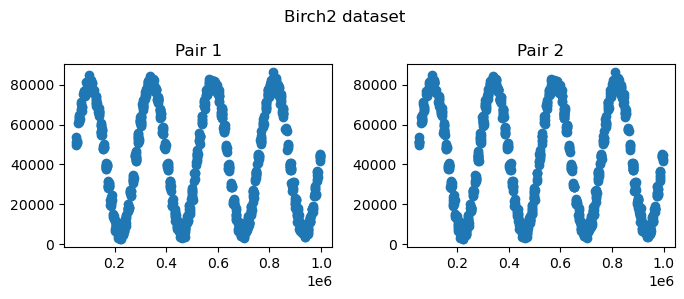

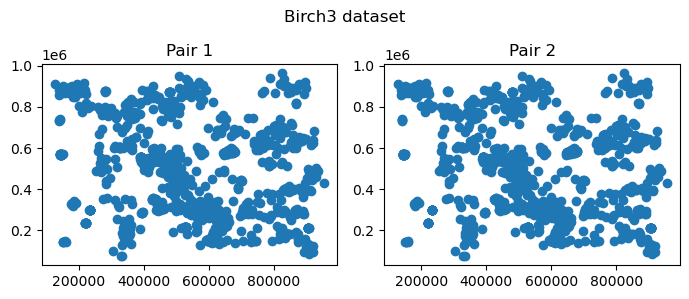

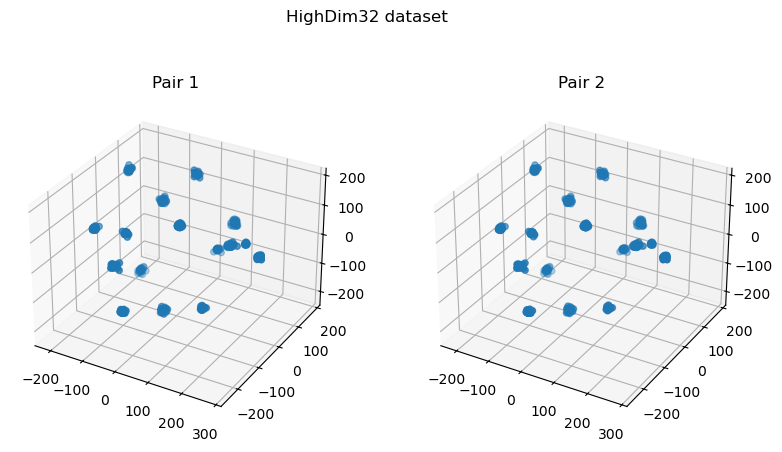

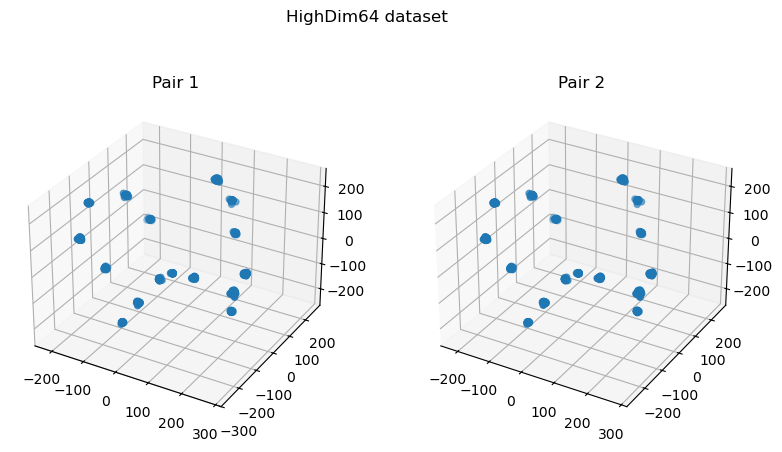

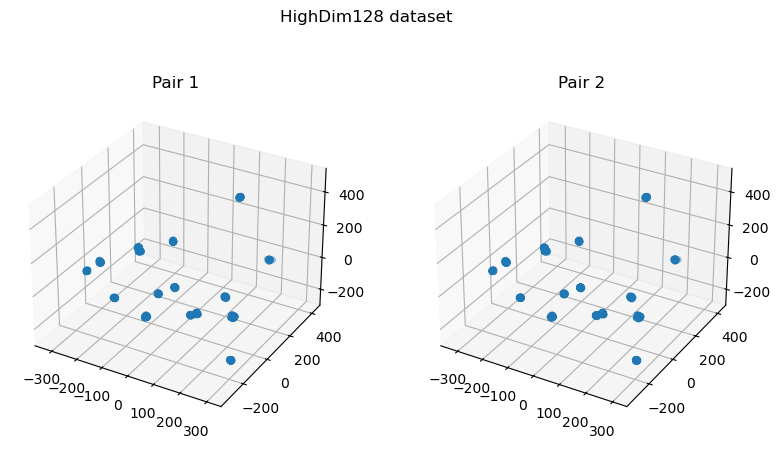

In [7]:
from src.plot_helper import plot_data
from src.datasets import *
from os.path import join, isdir
from os import mkdir
ds_path = "./dataset"
dataset = [Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=10), 
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=50),
           Geo(join(ds_path, "snap_standford/Gowalla_epsilon.csv"), "Gowalla", lamb=1.001, k=50),
           Birch(join(ds_path, "birch/shrink_birch1_epsilon.csv"), subset=1, lamb=1.1, k=10),
           Birch(join(ds_path, "birch/shrink_birch2_epsilon.csv"), subset=2, lamb=1.1, k=10),
           Birch(join(ds_path, "birch/shrink_birch3_epsilon.csv"), subset=3, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim032_epsilon.csv"), dim=32, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim064_epsilon.csv"), dim=64, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim128_epsilon.csv"), dim=128, lamb=1.1, k=10)
           ]
plot_path = "./dataset/plot"
if not isdir(plot_path):
    mkdir(plot_path)
for ds in dataset:
    pair1, pair2 = ds.load()
    plot_data(pair1, pair2, plot_path, ds.name)

### Calculate possible range for epsilon

In [8]:
from pprint import pprint
def pick_epsilon(lambda_, n):
    epsilion_lower_bound = (3 * np.log(ds.lamb) * np.log(n) ** 2) / n
    epsilion_upper_bound = 1 
    epsilon = np.random.uniform(epsilion_lower_bound, epsilion_upper_bound)
    while (1+epsilon) >= lambda_:
        epsilon = np.random.uniform(epsilion_lower_bound, epsilion_upper_bound)
    
    return epsilon
dataset = [Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=10), 
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=50),
           Geo(join(ds_path, "snap_standford/Gowalla_epsilon.csv"), "Gowalla", lamb=1.001, k=50),
           Birch(join(ds_path, "birch/shrink_birch1_epsilon.csv"), subset=1, lamb=1.1, k=10),
           Birch(join(ds_path, "birch/shrink_birch2_epsilon.csv"), subset=2, lamb=1.1, k=10),
           Birch(join(ds_path, "birch/shrink_birch3_epsilon.csv"), subset=3, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim032_epsilon.csv"), dim=32, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim064_epsilon.csv"), dim=64, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim128_epsilon.csv"), dim=128, lamb=1.1, k=10)
           ]
# Create epsilon for each lambda and data size combination

eps_dict = {}
for ds in dataset:
    lamb = ds.lamb
    pair1, pair2 = ds.load()
    n = len(pair1)
    print(f'{lamb}, {n}, {pick_epsilon(lamb, n)}')
    if lamb == 1.1:
        epsilon = 0.05
    elif lamb == 1.001:
        epsilon = 0.0005
    eps_dict[(lamb,n)] = epsilon
pprint(eps_dict)


1.1, 1090, 0.022181968379326077
1.1, 2267, 0.022026314161762484
1.001, 6265, 0.0008535596401331937
1.1, 1000, 0.04281505496248479
1.1, 1000, 0.0947577307765906
1.1, 1000, 0.06416672451687358
1.1, 1024, 0.03127004577073142
1.1, 1024, 0.04219147056997978
1.1, 1024, 0.05708293527709826
{(1.001, 6265): 0.0005,
 (1.1, 1000): 0.05,
 (1.1, 1024): 0.05,
 (1.1, 1090): 0.05,
 (1.1, 2267): 0.05}


## Experiment

In [9]:
# alter these 2 variable to generate different result 
basline_set_random_seed = False
resilient_set_random_seed = False

### k-resillient

In [10]:
import numpy as np
from src.resilient_k import resilient_k_center
from src.datasets import *
from os.path import join, isdir
from os import mkdir, makedirs
from src.plot_helper import plot_cluster_result
import pickle

In [11]:
def experiment(ds, resilient_k_param, plot_path, result_path, epsilon):
    for algo in resilient_k_param["algorithm"]:
        for alpha in resilient_k_param["alpha"]:
            for beta in resilient_k_param["beta"]:  
                if resilient_set_random_seed:
                    loop_content = resilient_k_param["seed"]
                else:
                    loop_content = [None] * len(resilient_k_param["seed"])
                for i, seed in enumerate(loop_content):   
                    
                    print(f"Processing {ds.name} dataset with k={ds.k}, lamb={ds.lamb}, alpha={alpha}, beta={beta}, algorithm={algo}, seed={seed}, epsilon={epsilon}")
                    pair1, pair2 = ds.load()                    
                    
                    model1 = resilient_k_center(pair1, k=ds.k, lamb=ds.lamb, epsilon=epsilon, alpha=alpha, beta=beta, algorithm=algo, seed=seed)
                    #start_time = time.process_time_ns()
                    center1, cluster1 = model1.resilient_k_center()
                    #end_time = time.process_time_ns()
                    #time_taken1 = end_time - start_time
                    
                    model2 = resilient_k_center(pair2, k=ds.k, lamb=ds.lamb, epsilon=epsilon, alpha=alpha, beta=beta, algorithm=algo, seed=seed)
                    #start_time = time.process_time_ns()
                    center2, cluster2 = model2.resilient_k_center()
        
                    #end_time = time.process_time_ns()
                    #time_taken2 = end_time - start_time
                    if seed == None:
                        seed = "None" + "_" + str(i)
                    seed_result_path = join(result_path, f'{seed}')
                    if not isdir(seed_result_path):
                        mkdir(seed_result_path)
                    this_result_path = join(seed_result_path, f'{ds.name}')
                    if not isdir(this_result_path):
                        mkdir(this_result_path)
                        
                    with open(join(this_result_path, f"{ds.name}_resilient_{ds.k}_{algo}({alpha}_{beta}).pickle"), 'wb') as output_file:
                        #pickle.dump((center1, cluster1, center2, cluster2, time_taken1, time_taken2), output_file)
                        pickle.dump((center1, cluster1, center2, cluster2), output_file)
                        
                    pt1 = np.asarray([c[0] for c in cluster1])
                    pt2 = np.asarray([c[0] for c in cluster2])
                    label1 = [c[1] for c in cluster1]
                    label2 = [c[1] for c in cluster2]
                    
                    # for plotting labelled clustering result
                    seed_plot_path = join(plot_path, f'{seed}')
                    if not isdir(seed_plot_path):
                        mkdir(seed_plot_path)
                    this_plot_path = join(seed_plot_path, ds.name)
                    if not isdir(this_plot_path):
                        mkdir(this_plot_path)
                        
                    plot_cluster_result(pt1, pt2, label1, label2, this_plot_path, ds, f'Con{algo[0].title()}({alpha}, {beta})')
                    

In [12]:
ds_path = "./dataset"
resilient_k_param ={"alpha": [0.5, 1.0], 
                    "beta": [0.5, 1.0],
                    "algorithm": ["gonz", "carv"],
                    "seed": [5331,5332,5333]}
plot_path = "./results/plot/resilient_k/"
result_path = "./results/resilient_k/"
if not isdir(plot_path):
    makedirs(plot_path)
if not isdir(result_path):
    makedirs(result_path)

#### 1. Uber

Processing Uber dataset with k=10, lamb=1.1, alpha=0.5, beta=0.5, algorithm=gonz, seed=None, epsilon=0.05


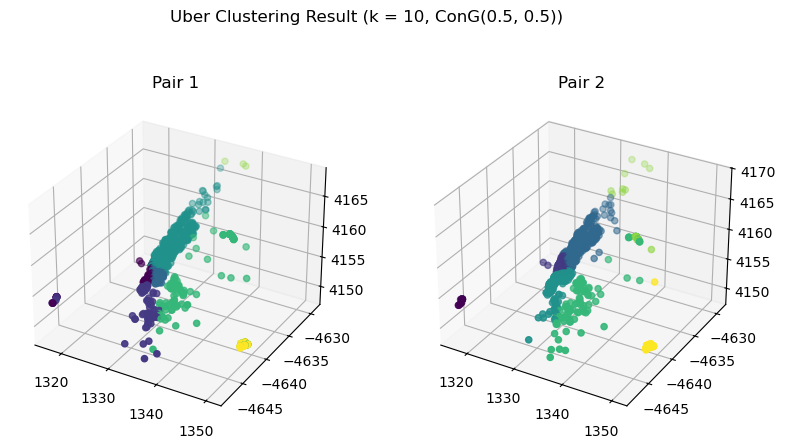

Processing Uber dataset with k=10, lamb=1.1, alpha=0.5, beta=0.5, algorithm=gonz, seed=None, epsilon=0.05


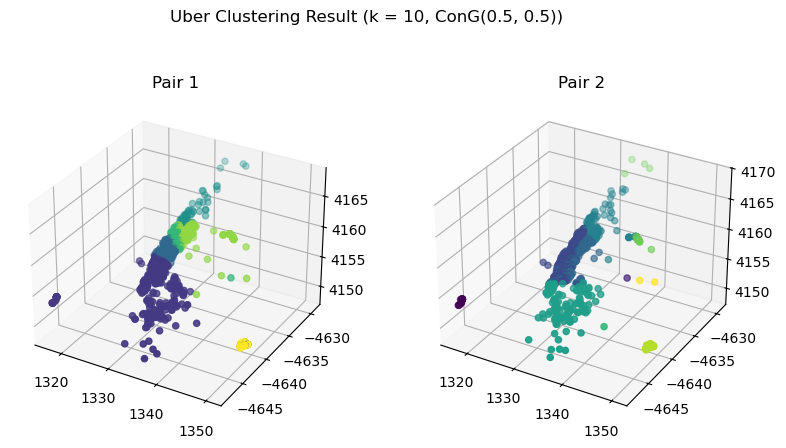

Processing Uber dataset with k=10, lamb=1.1, alpha=0.5, beta=0.5, algorithm=gonz, seed=None, epsilon=0.05


KeyboardInterrupt: 

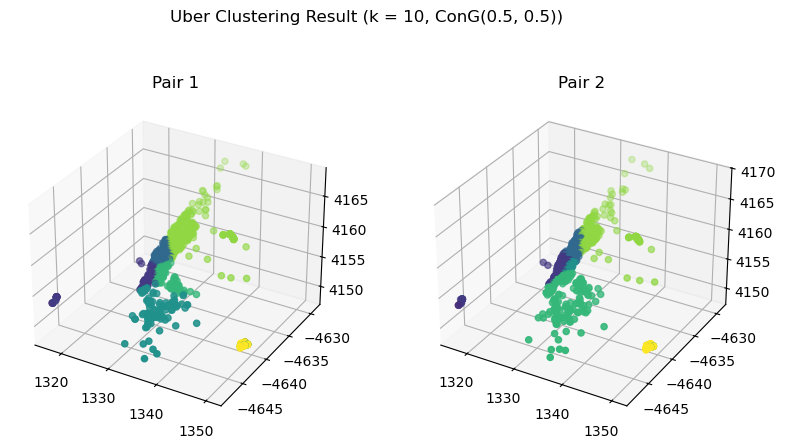

In [13]:
dataset = [Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=10),
           Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=20)]

for ds in dataset:
    experiment(ds, resilient_k_param, plot_path, result_path, epsilon=eps_dict[(ds.lamb, len(pair1))])

#### 2. Brightkite

In [14]:
dataset = [Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=50), 
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=100)]#,
           #Geo(join(ds_path, "snap_standford/Gowalla_epsilon.csv"), "Gowalla", lamb=1.001, k=50),
           #Geo(join(ds_path, "snap_standford/Gowalla_epsilon.csv"), "Gowalla", lamb=1.001, k=100)]

for ds in dataset:
    experiment(ds, resilient_k_param, plot_path, result_path, epsilon=eps_dict[(ds.lamb, len(pair1))])

Processing Brightkite dataset with k=50, lamb=1.1, alpha=0.5, beta=0.5, algorithm=gonz, seed=None, epsilon=0.05


KeyboardInterrupt: 

#### 3. Birch

Processing Birch1 dataset with k=10, lamb=1.1, alpha=0.5, beta=0.5, algorithm=gonz, seed=None, epsilon=0.05


KeyboardInterrupt: 

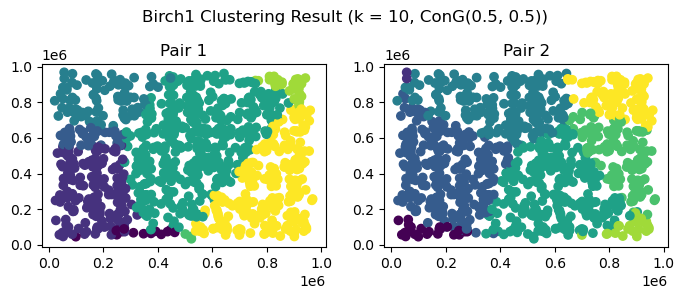

In [15]:
dataset = [Birch(join(ds_path, "birch/shrink_birch1_epsilon.csv"), subset=1, lamb=1.1, k=10),
           Birch(join(ds_path, "birch/shrink_birch1_epsilon.csv"), subset=1, lamb=1.1, k=20),
           Birch(join(ds_path, "birch/shrink_birch2_epsilon.csv"), subset=2, lamb=1.1, k=10),
           Birch(join(ds_path, "birch/shrink_birch2_epsilon.csv"), subset=2, lamb=1.1, k=20),
           Birch(join(ds_path, "birch/shrink_birch3_epsilon.csv"), subset=3, lamb=1.1, k=10),
           Birch(join(ds_path, "birch/shrink_birch3_epsilon.csv"), subset=3, lamb=1.1, k=20)]

for ds in dataset:
    experiment(ds, resilient_k_param, plot_path, result_path, epsilon=eps_dict[(ds.lamb, len(pair1))])

#### 4.High dim 

In [16]:
dataset = [HighDim(join(ds_path, "high_dim/dim032_epsilon.csv"), dim=32, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim032_epsilon.csv"), dim=32, lamb=1.1, k=20),
           HighDim(join(ds_path, "high_dim/dim064_epsilon.csv"), dim=64, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim064_epsilon.csv"), dim=64, lamb=1.1, k=20),
           HighDim(join(ds_path, "high_dim/dim128_epsilon.csv"), dim=128, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim128_epsilon.csv"), dim=128, lamb=1.1, k=20)]
for ds in dataset:
    experiment(ds, resilient_k_param, plot_path, result_path, epsilon=eps_dict[(ds.lamb, len(pair1))])

Processing HighDim32 dataset with k=10, lamb=1.1, alpha=0.5, beta=0.5, algorithm=gonz, seed=None, epsilon=0.05


KeyboardInterrupt: 

## Evalutaion

In [17]:
from os.path import join, isdir, isfile
from os import mkdir
from src.datasets import *
import pickle

In [18]:
ds_path = "./dataset"
resilient_k_param ={"alpha": [0.5, 1.0], 
                    "beta": [0.5, 1.0],
                    "algorithm": ["gonz", "carv"]}

to_eval = [Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=10),
           Uber(join(ds_path, "uber/uber_epsilon.csv"), lamb=1.1, k=20),
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=50), 
           Geo(join(ds_path, "snap_standford/Brightkite_epsilon.csv"), "Brightkite", lamb=1.1, k=100),
           Birch(join(ds_path, "birch/shrink_birch1_epsilon.csv"), subset=1, lamb=1.1, k=10),
           Birch(join(ds_path, "birch/shrink_birch1_epsilon.csv"), subset=1, lamb=1.1, k=20),
           Birch(join(ds_path, "birch/shrink_birch2_epsilon.csv"), subset=2, lamb=1.1, k=10),
           Birch(join(ds_path, "birch/shrink_birch2_epsilon.csv"), subset=2, lamb=1.1, k=20),
           Birch(join(ds_path, "birch/shrink_birch3_epsilon.csv"), subset=3, lamb=1.1, k=10),
           Birch(join(ds_path, "birch/shrink_birch3_epsilon.csv"), subset=3, lamb=1.1, k=20), 
           HighDim(join(ds_path, "high_dim/dim032_epsilon.csv"), dim=32, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim032_epsilon.csv"), dim=32, lamb=1.1, k=20),
           HighDim(join(ds_path, "high_dim/dim064_epsilon.csv"), dim=64, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim064_epsilon.csv"), dim=64, lamb=1.1, k=20),
           HighDim(join(ds_path, "high_dim/dim128_epsilon.csv"), dim=128, lamb=1.1, k=10),
           HighDim(join(ds_path, "high_dim/dim128_epsilon.csv"), dim=128, lamb=1.1, k=20) 
           ]
result_path = "./results/baseline"
random_seed = [5331,5332,5333]

### Baseline

#### 1. Gonz algorithm

In [19]:
from src.evaluation import Gonz_Approx_Algo
result_path = "./results/baseline"
for ds in to_eval:
    if basline_set_random_seed:
        loop_content = random_seed
    else:
        loop_content = [None] * len(random_seed)
    for i, seed in enumerate(loop_content):
        print(f"Processing {ds.name} dataset with k={ds.k}, algorithm=gonz_only")
        pair1, pair2 = ds.load()
        model1 = Gonz_Approx_Algo(pair1, ds.k, seed)
        center1, cluster1 = model1.clustering()
        model2 = Gonz_Approx_Algo(pair2, ds.k, seed)
        center2, cluster2 = model2.clustering()

        if seed == None:
            seed = "None" + "_" + str(i)
        seed_result_path = join(result_path, f'{seed}')
        if not isdir(seed_result_path):
            mkdir(seed_result_path)
        this_result_path = join(seed_result_path, f'{ds.name}')
        if not isdir(this_result_path):
            mkdir(this_result_path)
        with open(join(this_result_path, f"{ds.name}_resilient_{ds.k}_gonz_only.pickle"), 'wb') as output_file:
            pickle.dump((center1, cluster1, center2, cluster2), output_file)

Processing Uber dataset with k=10, algorithm=gonz_only
Processing Uber dataset with k=10, algorithm=gonz_only
Processing Uber dataset with k=10, algorithm=gonz_only


KeyboardInterrupt: 

#### 2. Carve algorithm only

In [20]:
from src.evaluation import CarvingAlgorithm
result_path = "./results/baseline"
for ds in to_eval:
    if basline_set_random_seed:
        loop_content = random_seed
    else:
        loop_content = [None] * len(random_seed)
    for i, seed in enumerate(loop_content):
        print(f"Processing {ds.name} dataset with k={ds.k}, algorithm=gonz_only")
        pair1, pair2 = ds.load()
        
        model1 = CarvingAlgorithm(pair1, seed=seed)
        best_r = model1.find_minimum_R(ds.k)
        center1, cluster1 = model1.carve(best_r, ds.k)
        model2 = CarvingAlgorithm(pair2, seed=seed)
        best_r = model2.find_minimum_R(ds.k)
        center2, cluster2 = model2.carve(best_r, ds.k)
        if seed == None:
            seed = "None" + "_" + str(i)
        seed_result_path = join(result_path, f'{seed}')
        if not isdir(seed_result_path):
            mkdir(seed_result_path)
        this_result_path = join(seed_result_path, f'{ds.name}')
        if not isdir(this_result_path):
            mkdir(this_result_path)
        with open(join(this_result_path, f"{ds.name}_resilient_{ds.k}_carve_only.pickle"), 'wb') as output_file:
            pickle.dump((center1, cluster1, center2, cluster2), output_file)

Processing Uber dataset with k=10, algorithm=gonz_only


KeyboardInterrupt: 

### Visualization
Use directory structure from one drive for results

In [21]:
# alter these 2 variable to generate different plot after generation
basline_set_random_seed = True
resilient_set_random_seed = True

D:\School\PG\2024 Fall\Comp 5331\Group project\comp5331-grp6\src\plot_helper.py:310: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


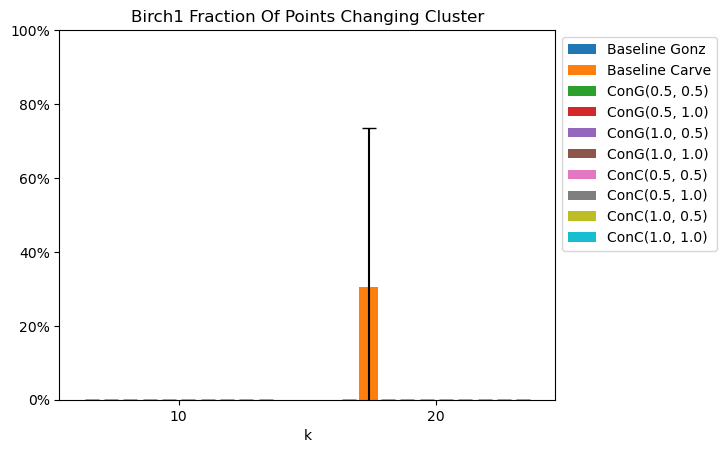

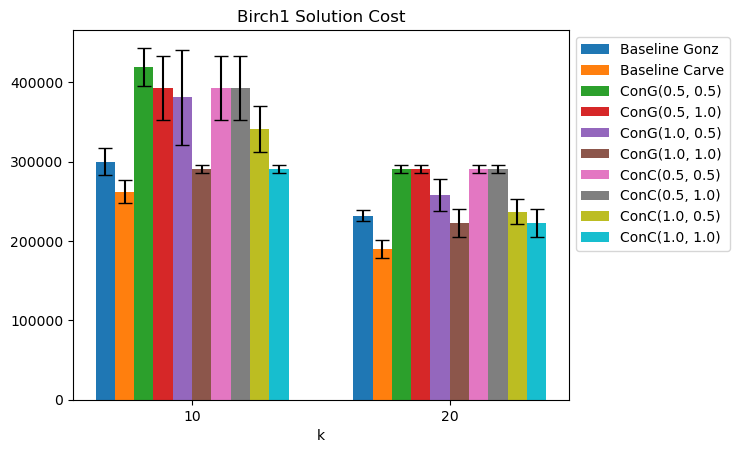

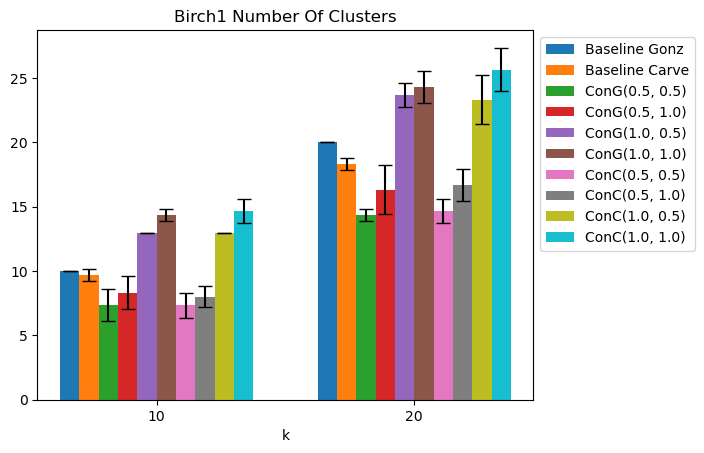

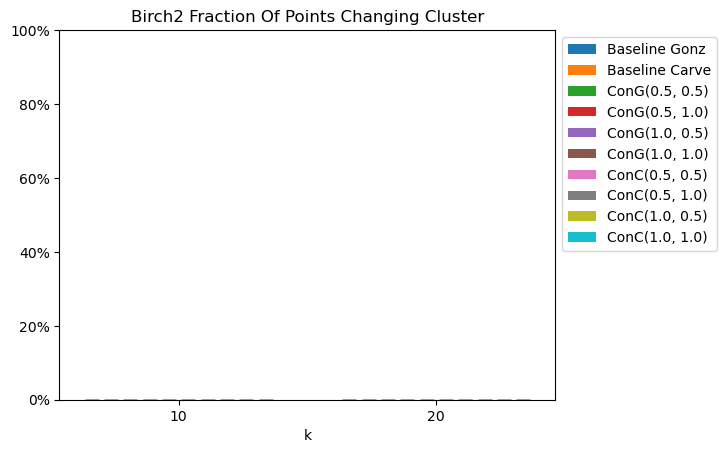

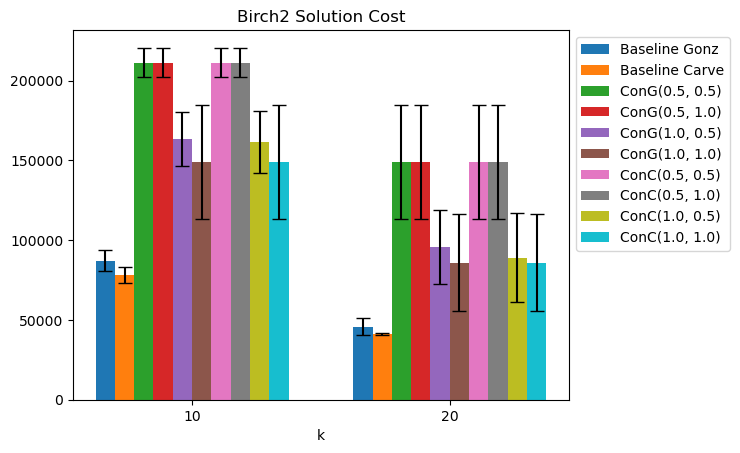

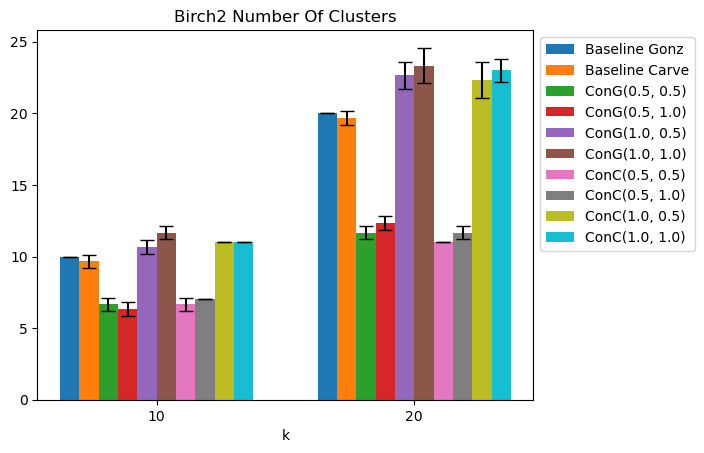

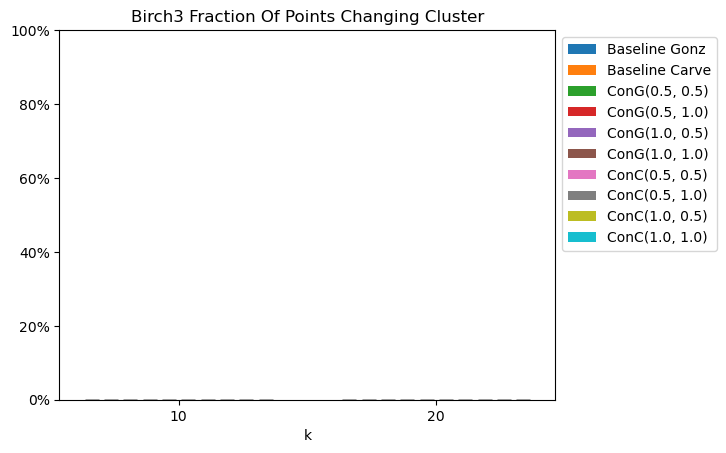

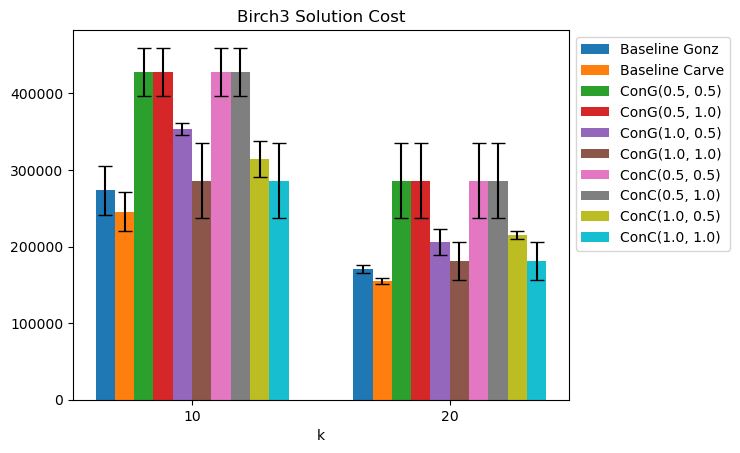

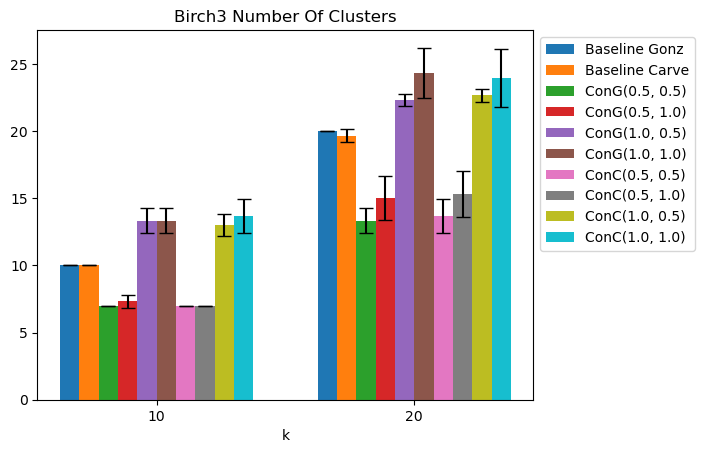

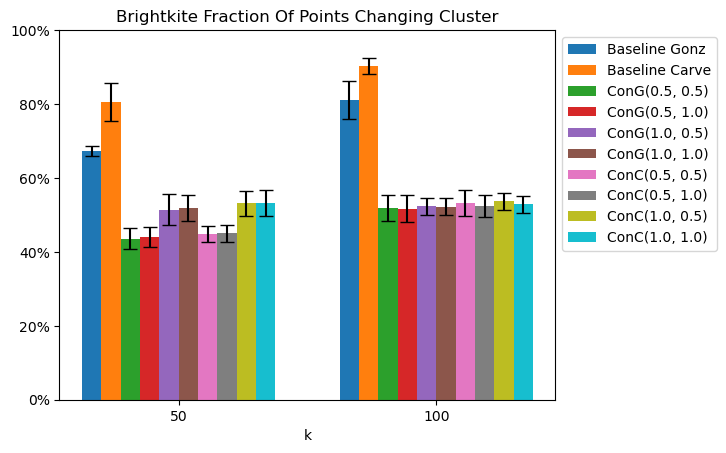

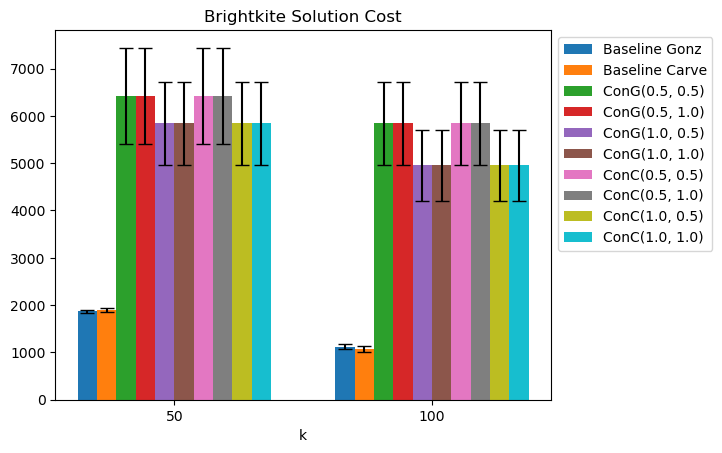

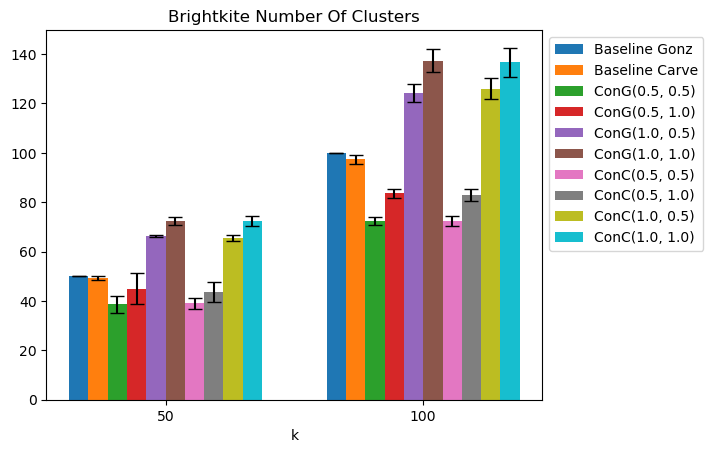

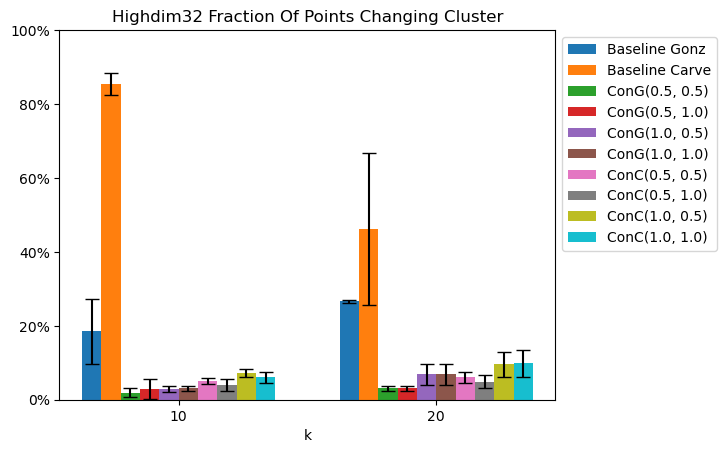

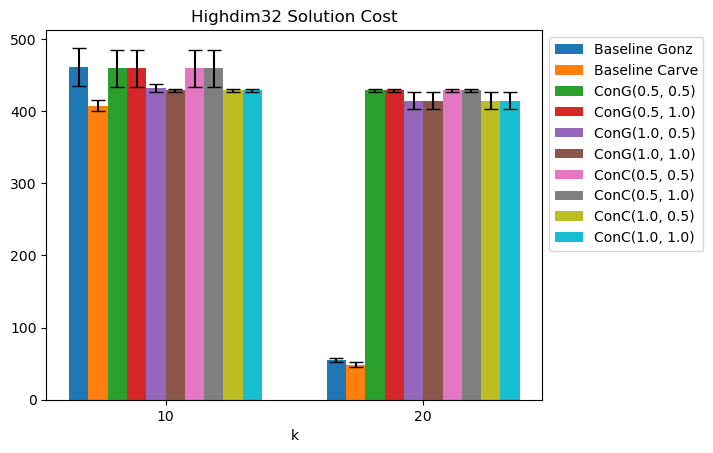

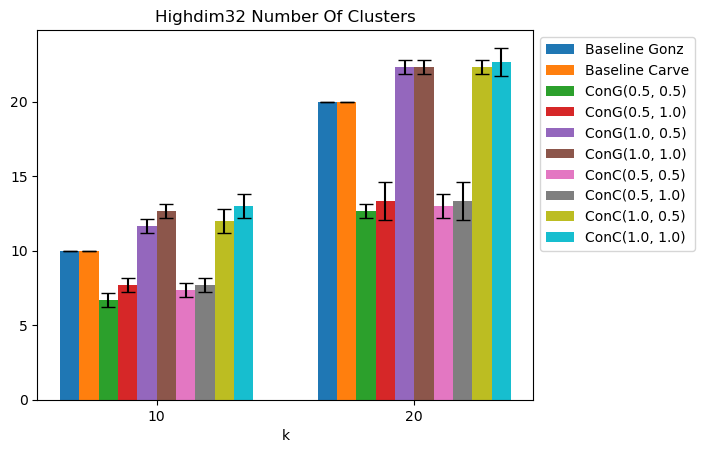

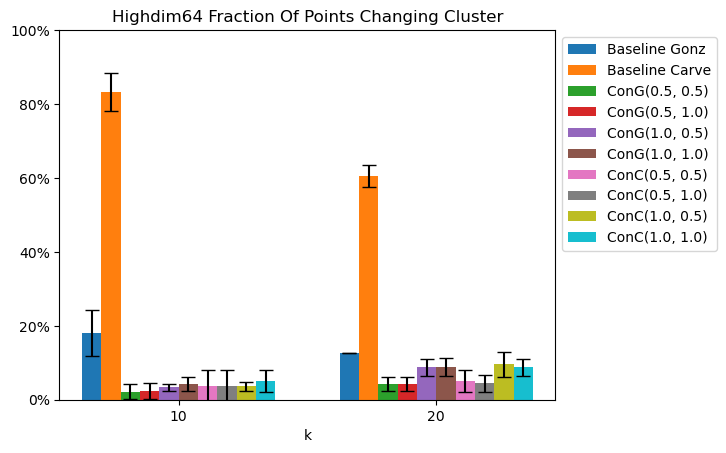

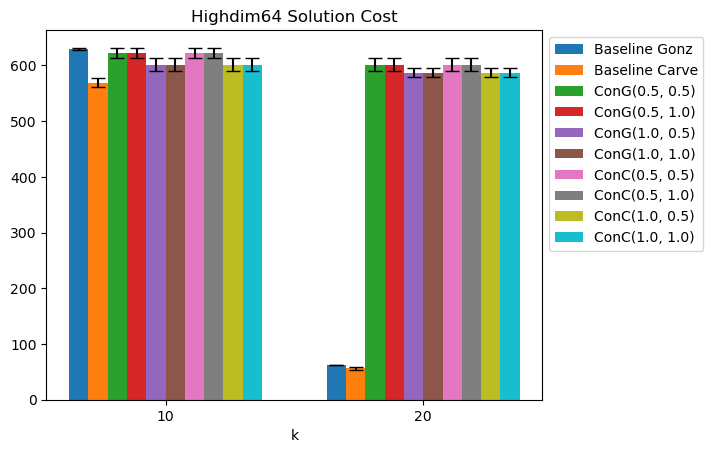

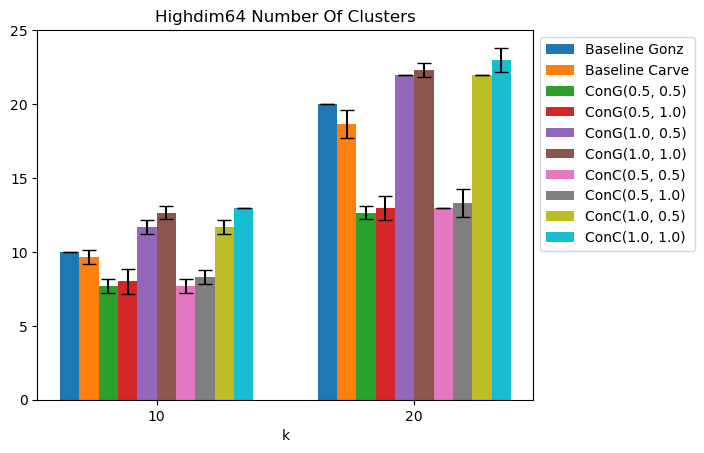

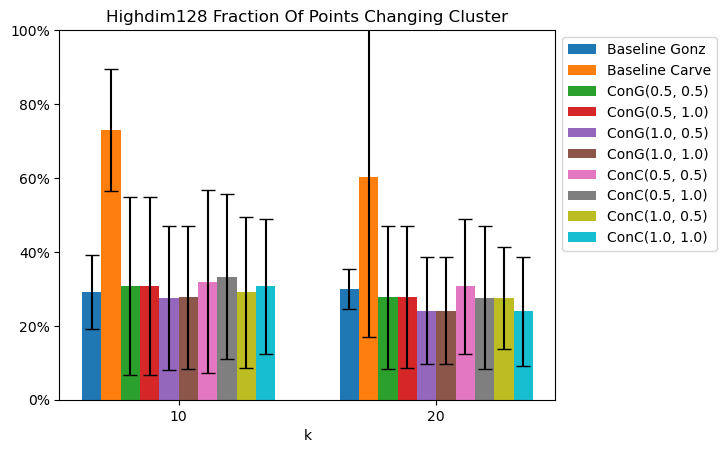

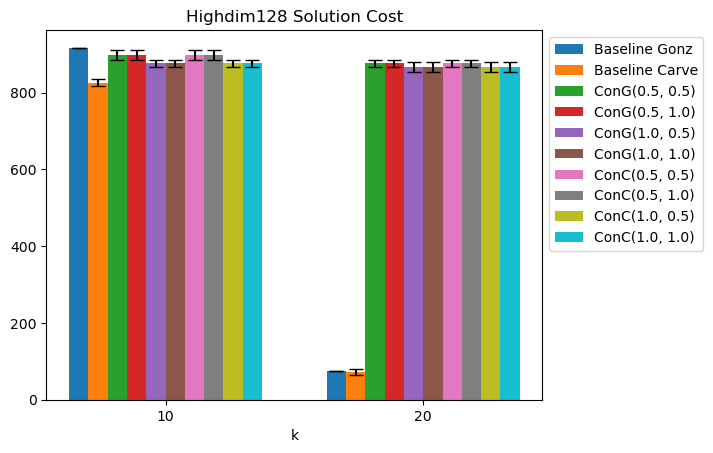

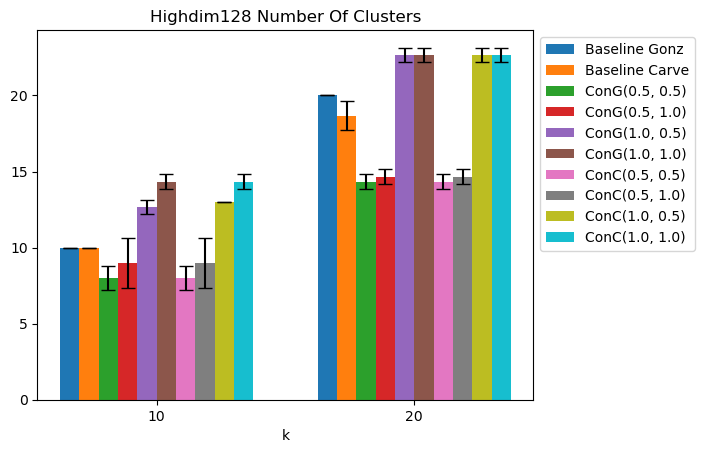

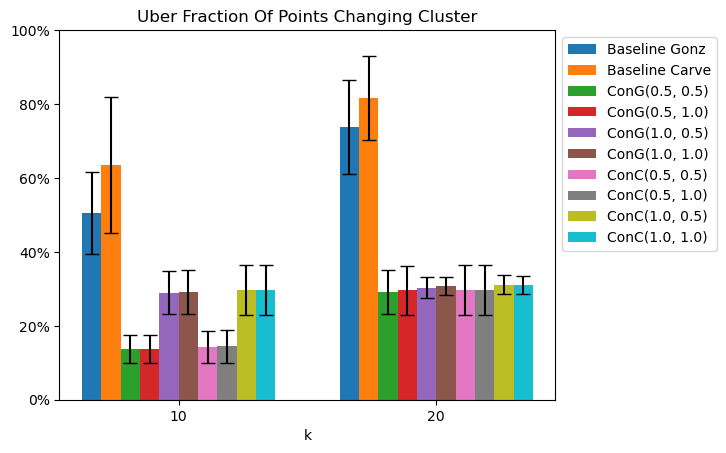

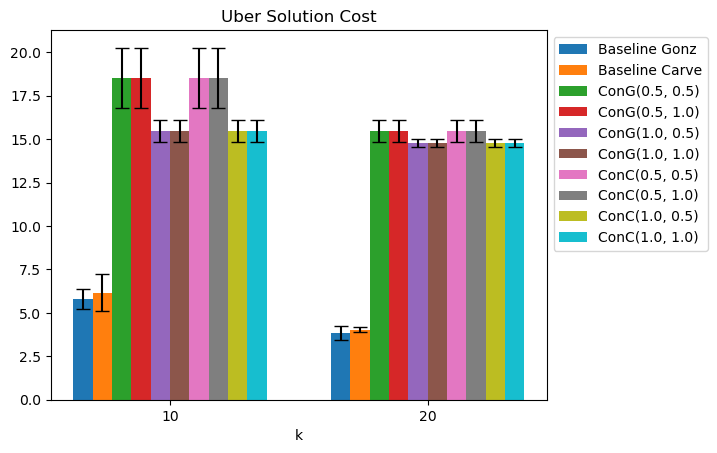

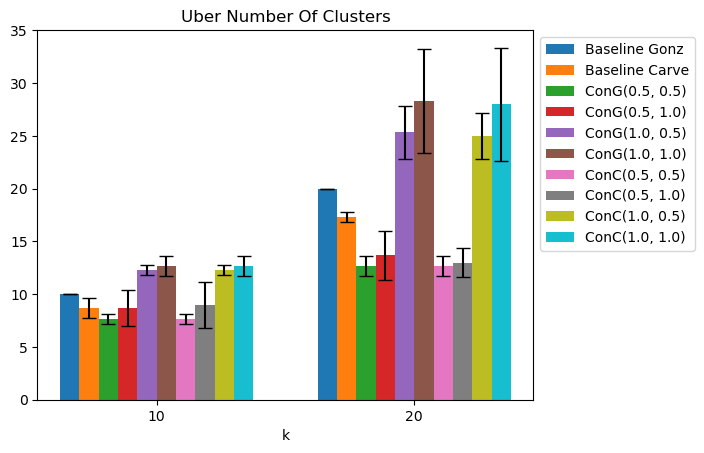

In [24]:
from src.plot_helper import plot_bar

results ={
    # dataset : k, seed, a, b (need to access resilient and baseline)
    'Birch1': [[10, 20],[5331,5332,5333], (0.5, 1.0), (0.5, 1.0)],
    'Birch2': [[10, 20],[5331,5332,5333], (0.5, 1.0), (0.5, 1.0)],
    'Birch3': [[10, 20],[5331,5332,5333], (0.5, 1.0), (0.5, 1.0)],
    'Brightkite': [[50,100],[5331,5332,5333], (0.5, 1.0), (0.5, 1.0)],
    'HighDim32' : [[10,20],[5331,5332,5333], (0.5, 1.0), (0.5, 1.0)],
    'HighDim64' : [[10,20],[5331,5332,5333], (0.5, 1.0), (0.5, 1.0)],
    'HighDim128' : [[10,20],[5331,5332,5333], (0.5, 1.0), (0.5, 1.0)],
    'Uber': [[10, 20], [5331,5332,5333], (0.5, 1.0), (0.5, 1.0)]
}
resilient_k_models = ["gonz", "carv"]
baseline_models = ["gonz", "carve"]
cluster_results = {}

results_path = "./results/dennis_final_results"
eval_path = f"./{results_path}/log/"
if not isdir(eval_path):
    mkdir(eval_path)

plot_bar(results, resilient_k_models, baseline_models, results_path, eval_path, basline_set_random_seed, resilient_set_random_seed)